## Importing Libraries and Data 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#lodaing data
train = pd.read_csv('https://raw.githubusercontent.com/vidoolytech/hiringtask/master/machine_learning/ad_org/data/mn/ad_org_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/vidoolytech/hiringtask/master/machine_learning/ad_org/data/mn/ad_org_test.csv')

In [3]:
#copying test id
s_id = test['vidid']

In [4]:
#converting duration to seconds
def dur(string):
    string = string[2:]
    for ch in ['H','M','S']:
        if ch in string:
            string = string.replace(ch,' ')
    string = string.split(' ')
    string.remove('')
    if len(string) == 3:
        hrs, mins, secs = int(string[0])*3600, int(string[1])*60, int(string[2])
        return (hrs+mins+secs)
    elif len(string) == 2:
        mins, secs = int(string[0])*60, int(string[1])
        return (mins+secs)
    else:
        secs = int(string[0])
        return secs
    return

train['duration'] = train['duration'].apply(dur)
test['duration'] = test['duration'].apply(dur)

In [5]:
#converting to datetime column
train['published'] = train['published'].apply(pd.to_datetime)
test['published'] = test['published'].apply(pd.to_datetime)

#extracting info from datetime column
train['pub_day'] = train['published'].apply(lambda x: x.day)
train['pub_month'] = train['published'].apply(lambda x: x.month)
train['pub_year'] = train['published'].apply(lambda x: x.year)
train['pub_dayofweek'] = train['published'].apply(lambda x: x.dayofweek)

test['pub_day'] = test['published'].apply(lambda x: x.day)
test['pub_month'] = test['published'].apply(lambda x: x.month)
test['pub_year'] = test['published'].apply(lambda x: x.year)
test['pub_dayofweek'] = test['published'].apply(lambda x: x.dayofweek)

In [6]:
#dropping column after extraction
train.drop('published', axis = 1, inplace=True)
test.drop('published', axis = 1, inplace=True)

In [7]:
#converting to integer
train['adview'] = train['adview'].apply(int)

In [8]:
#converting everything else to integer except for the 'F' 
cols = ['views','likes','dislikes','comment']
def str_int(x):
    if x != 'F':
        x = int(x)
        return x
    return 'F'

for i in cols:
    train[i] = train[i].apply(str_int)
    test[i] = test[i].apply(str_int)

In [9]:
#filling the 'F' data with values
#missing values are filled by percentage of likes/dislikes/comments by mean views per category
def fill_likes(x):
    if x[2] == 'F':
        if x[1] == 'A':
            return (x[0]*0.6)
        elif x[1] == 'B':
            return (x[0]*0.8)
        elif x[1] == 'C':
            return (x[0]*0.2)
        elif x[1] == 'D':
            return (x[0]*0.3)
        elif x[1] == 'E':
            return (x[0]*0.2)
        elif x[1] == 'F':
            return (x[0]*0.7)
        elif x[1] == 'G':
            return (x[0]*0.3)
        elif x[1] == 'H':
            return (x[0]*0.3)
    return x[2]

train['likes'] = train[['views','category','likes']].apply(fill_likes, axis = 1).apply(round)
test['likes'] = test[['views','category','likes']].apply(fill_likes, axis = 1).apply(round)

In [10]:
def fill_dislikes(x):
    if x[2] == 'F':
        if x[1] == 'A':
            return (x[0]*0.02)
        elif x[1] == 'B':
            return (x[0]*0.03)
        elif x[1] == 'C':
            return (x[0]*0.04)
        elif x[1] == 'D':
            return (x[0]*0.03)
        elif x[1] == 'E':
            return (x[0]*0.03)
        elif x[1] == 'F':
            return (x[0]*0.06)
        elif x[1] == 'G':
            return (x[0]*0.02)
        elif x[1] == 'H':
            return (x[0]*0.03)
    return x[2]

train['dislikes'] = train[['views','category','dislikes']].apply(fill_dislikes, axis = 1).apply(round)
test['dislikes'] = test[['views','category','dislikes']].apply(fill_dislikes, axis = 1).apply(round)

In [11]:
def fill_comment(x):
    if x[2] == 'F':
        if x[1] == 'A':
            return (x[0]*0.08)
        elif x[1] == 'B':
            return (x[0]*0.14)
        elif x[1] == 'C':
            return (x[0]*0.03)
        elif x[1] == 'D':
            return (x[0]*0.05)
        elif x[1] == 'E':
            return (x[0]*0.03)
        elif x[1] == 'F':
            return (x[0]*0.18)
        elif x[1] == 'G':
            return (x[0]*0.03)
        elif x[1] == 'H':
            return (x[0]*0.06)
    return x[2]

train['comment'] = train[['views','category','comment']].apply(fill_comment, axis = 1).apply(round)
test['comment'] = test[['views','category','comment']].apply(fill_comment, axis = 1).apply(round)

In [20]:
#encoding categorical column
train.replace({'category': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}}, inplace=True)
test.replace({'category': {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}}, inplace=True)

In [15]:
#drop two values from views
train.drop([7447,8112], inplace=True)

In [16]:
train['views'] = train['views'].apply(int)

In [17]:
#91% of the target variable lie below the value of 50, thus to get better accuracy we will ignore other values
train = train[train['adview'] < 50]

In [80]:
v_fill = round(test[(test['pub_year'] == 2013) & (test['pub_month'] == 10) & (test['views'] != 'F')]['views'].mean())

In [82]:
def fill_views(x):
    if x == 'F':
        x = v_fill
        return x
    return x
test['views'] = test['views'].apply(fill_views)

## Random Forest Regressor Model 

In [63]:
#here, i am dropping these columns because the adview is dependent upon views, duration and year
from sklearn.model_selection import train_test_split
X = train.drop(['vidid','adview','comment','likes','pub_day','dislikes','pub_dayofweek','category','pub_month'], axis =1)
y = train['adview']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
rfr = RandomForestRegressor(n_estimators= 300, min_samples_leaf=150, max_features=1, min_samples_split=4, n_jobs = -1)

In [64]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=150, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
pred = rfr.predict(X_test)

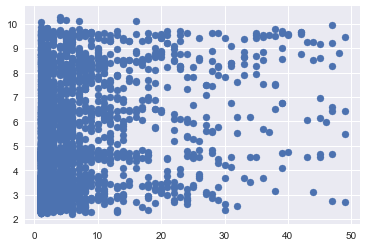

In [66]:
plt.scatter(y_test, pred)

In [41]:
from sklearn import metrics

In [67]:
print 'Mean Squared Error: %s' %metrics.mean_squared_error(y_test, pred)
print 'Root Mean Squared Error: %s' %np.sqrt(metrics.mean_squared_error(y_test, pred))

Mean Squared Error: 42.9892204265
Root Mean Squared Error: 6.55661653801


In [72]:
#Now predicting on the test data
X = train.drop(['vidid','adview','likes','dislikes','comment','category','pub_day','pub_dayofweek','pub_month'], axis = 1)
y = train['adview']

In [87]:
final_test = test.drop(['vidid','likes','dislikes','comment','category','pub_day','pub_dayofweek','pub_month'], axis = 1)

In [85]:
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=1, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=150, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
predictions = rfr.predict(final_test)

In [94]:
predictions = predictions.apply(round)

In [95]:
#preparing submission file
predictions = pd.Series(predictions)
ss = pd.concat([s_id, predictions], axis = 1)
ss.columns = ['vid_id','ad_view']
ss.to_csv('submission.csv', index=False)

## Data Analysis 

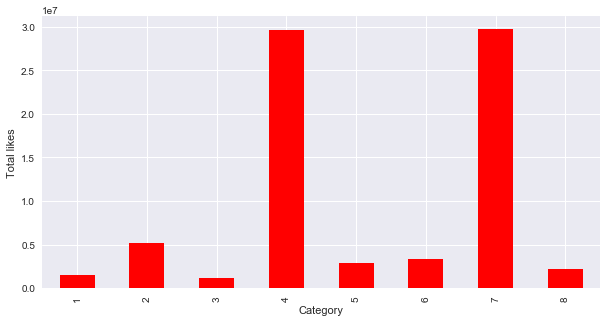

In [90]:
#total number of likes per category
plt.figure(figsize=(10,5))
train['likes'].groupby(train['category']).sum().plot(kind = 'bar', color='red')
plt.xlabel('Category')
plt.ylabel('Total likes')

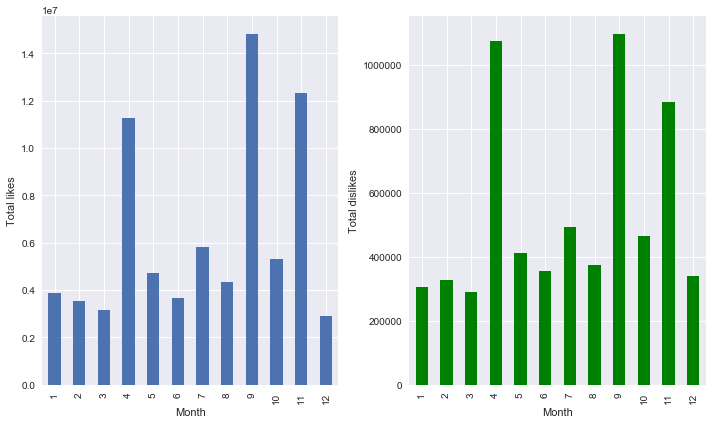

In [91]:
#total number of likes per month
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
train['likes'].groupby(train['pub_month']).sum().plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Total likes')

#total number of dislikes per month
plt.subplot(1,2,2)
train['dislikes'].groupby(train['pub_month']).sum().plot(kind = 'bar', color='g')
plt.xlabel('Month')
plt.ylabel('Total dislikes')

plt.tight_layout()

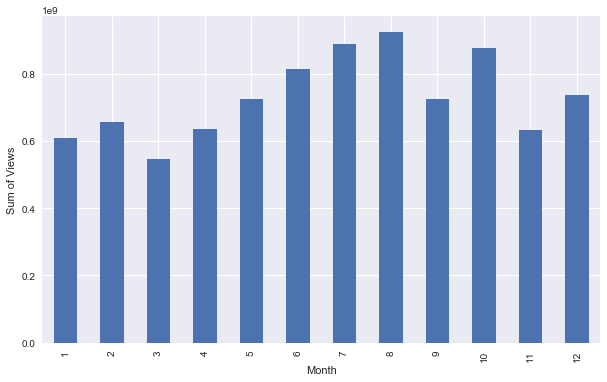

In [92]:
#total number of views per month
plt.figure(figsize=(10,6))
train['views'].groupby(train['pub_month']).sum().plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Sum of Views')

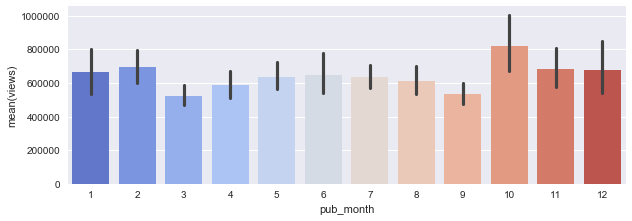

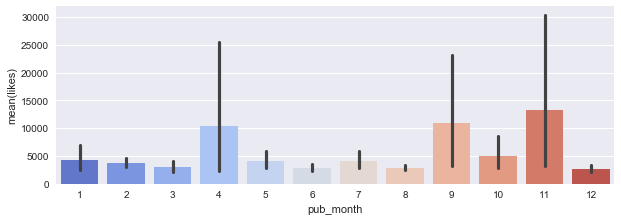

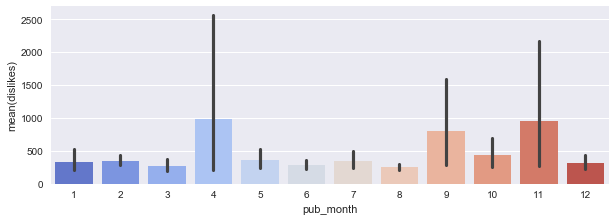

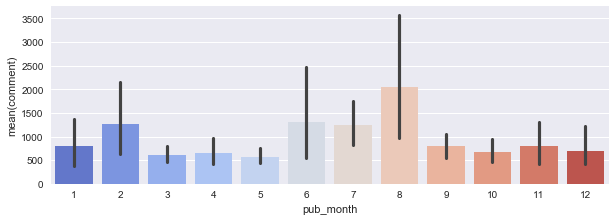

In [93]:
#mean views, likes, dislikes and comments per month
cols = ['views','likes','dislikes','comment']
x = 1
for i in cols:
    plt.figure(figsize=(10,15))
    plt.subplot(4,1,x)
    sns.barplot(x = 'pub_month', y = i, data=train, palette='coolwarm')
    x += 1

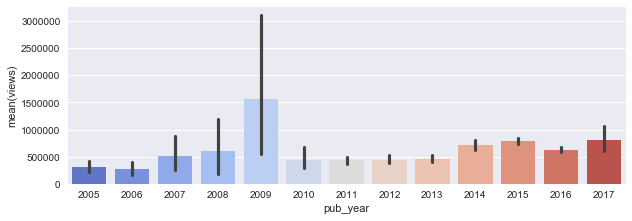

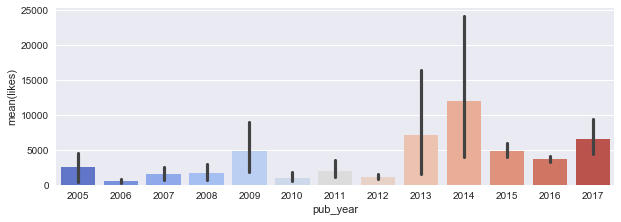

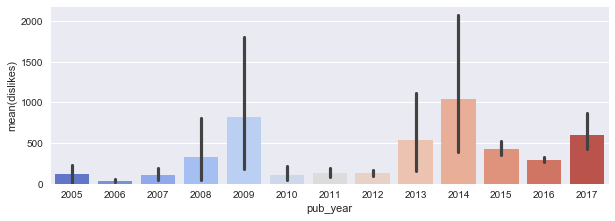

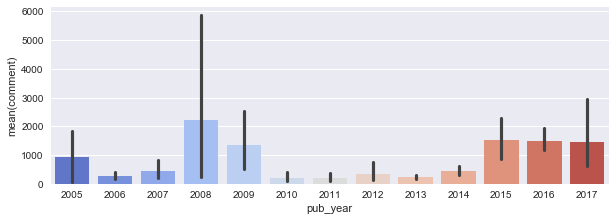

In [94]:
#mean views, likes, dislikes, comments per year
cols = ['views','likes','dislikes','comment']
x = 1
for i in cols:
    plt.figure(figsize=(10,15))
    plt.subplot(4,1,x)
    sns.barplot(x = 'pub_year', y = i, data=train,palette='coolwarm')
    x += 1

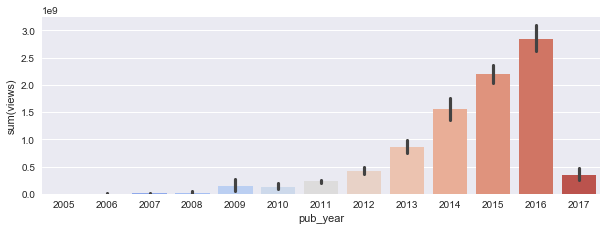

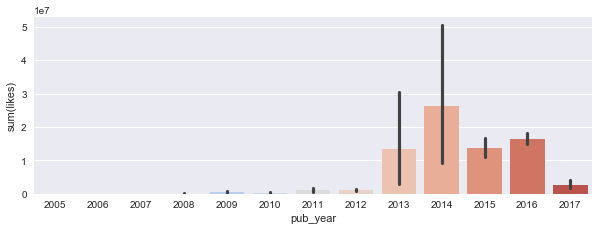

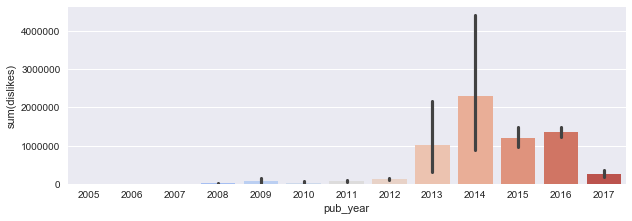

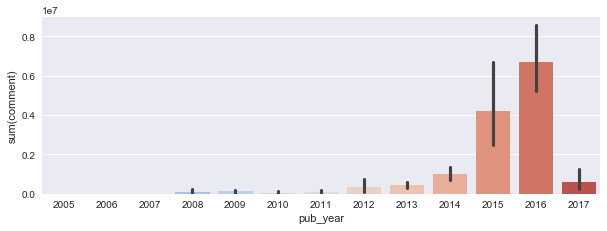

In [95]:
#total views, likes, dislikes, comments per year
cols = ['views','likes','dislikes','comment']
x = 1
for i in cols:
    plt.figure(figsize=(10,15))
    plt.subplot(4,1,x)
    sns.barplot(x = 'pub_year', y = i, data=train, estimator=sum, palette='coolwarm')
    x += 1

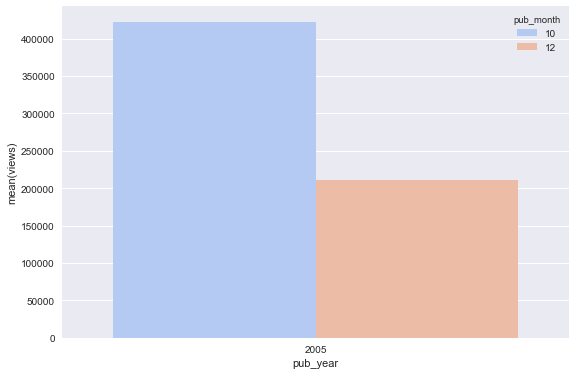

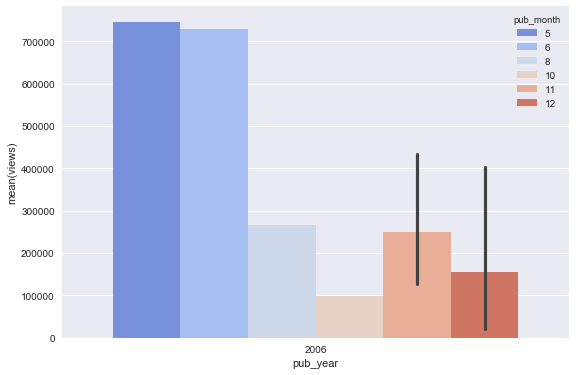

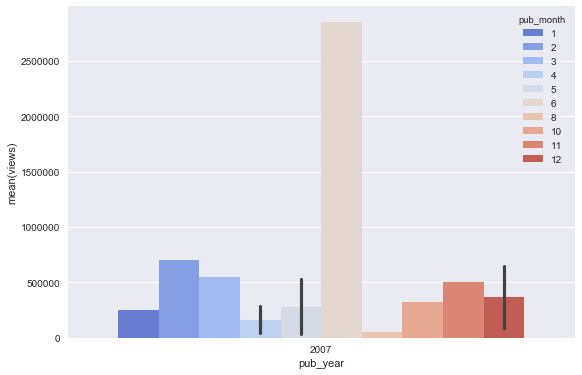

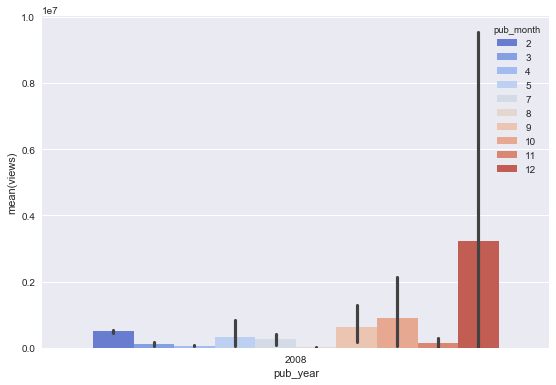

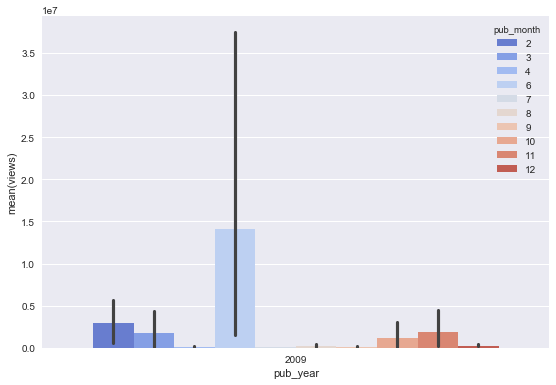

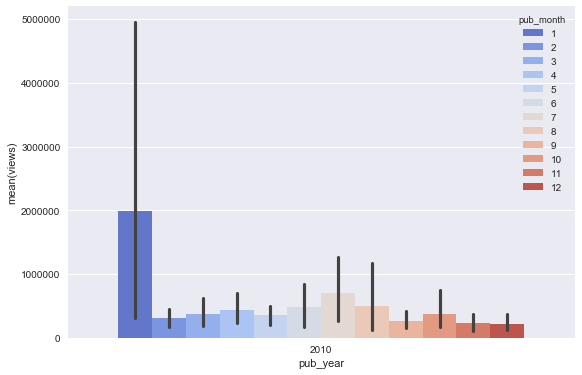

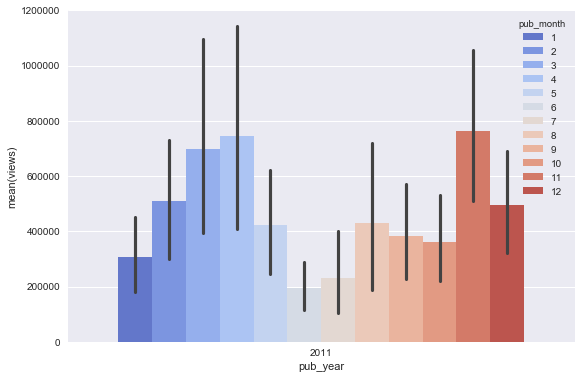

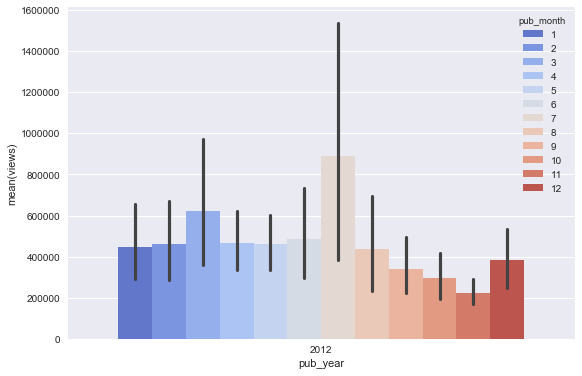

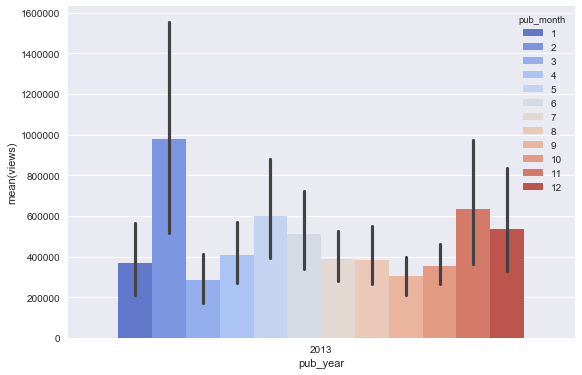

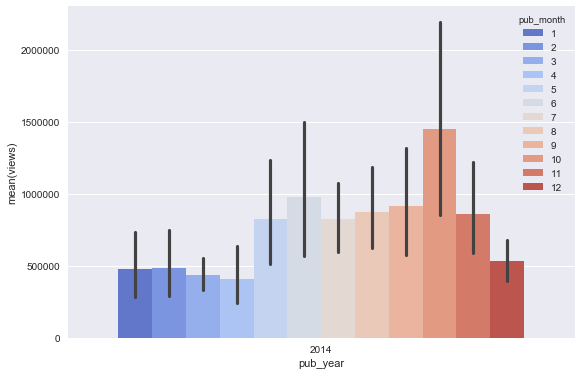

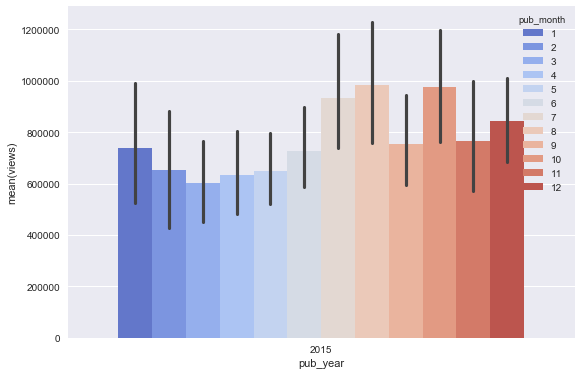

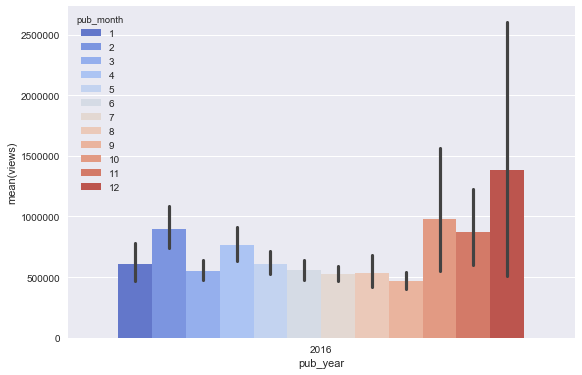

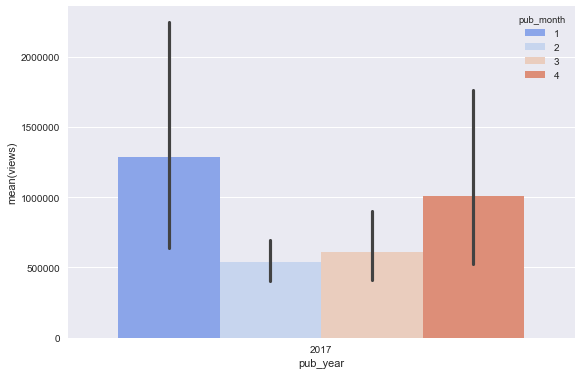

In [96]:
#mean views for months of every year
cols = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]
x = 1
for i in cols:
    plt.figure(figsize=(20,50))
    plt.subplot(7,2,x)
    sns.barplot(x='pub_year', y='views', data=train[train['pub_year'] == i], hue='pub_month', palette='coolwarm')
    x += 1